## Linear Discriminant Analysis (LDA) :


### Linear Discrimnant Analysis (LDA) as a Classifier:

  <ul>
  <li> It is a discriminative Technique which can be used as both Classifier and Dimensionality Reduction Technique. </li>
  <li> It is also used in Natural Language Processing especially for Topic Modelling. </li>
  <li> <b> Assumptions: </b> 
    <ul type="square">
    <li> All independent features must be continuous. </li>
    <li> Also, The independent fetaures must follow Multivariate Guassian Distribution.</li>
    <li> All Class Covariance Matrix are Equal.<br>
        Σ<sub>1</sub> = Σ<sub>2</sub> = ...... = Σ<sub>k</sub> [k classes in dependent feature].
       </li>
  </li></ul>
  <li> <b> Given: </b> D = { x<sub>i</sub> , y<sub>i</sub>} <sub>i=1</sub><sup>n</sup> 
  <li> <b> Objective: </b> f: R<sup>d</sup> → {C<sub>i</sub>,...,C<sub>k</sub>}
  </ul>
<h3> Steps : </h3>
<ol>
<li> Find Class Mean and Covariance Matrix. </li>
<li> Calculate Linear score function for each class. </li>
<br> 

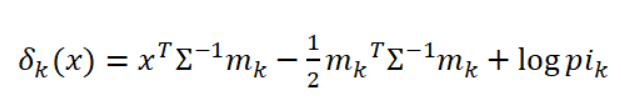 <br>
<li> Prediciton Rule: Class with highest Linear Score is the y<sup>^</sup> for given X<sub>i</sub></li>
</ol>


In [284]:
class LDA:
  def __init__(self,df,label):
    '''
    Constructor Function
    args:
    df: Dataframe of dataset
    label: dependent variable column name
    '''
    self.df = df
    self.y_label = label
  
  def calc_class_prob(self):
    '''
    Function to Calculate Class Probabilities for the given data
    args:
      None
    return: dictionary contain class probabilities.
    '''
    classes_prob = dict(df[self.y_label].value_counts())
    total = sum(list(classes_prob.values()))
    for i in classes_prob:
      classes_prob[i]/=total
    
    return classes_prob
  
  def calc_class_mean(self):
    '''
    Function to Calculate the class mean
    args:
      None
    return: dictionary containing class means
    '''
    cols = list(set(self.df.columns)-{self.y_label})
    classes = list(dict(df[self.y_label].value_counts()).keys())
    class_mean = {}
    for i in cols:
      for j in classes:
        temp = df[df[self.y_label]==j][i]
        class_mean[i+"_"+j] = round(sum(temp)/len(temp),3)

    return class_mean

  def calc_class_covariance_matirx(self):
    '''
    Function to Calculate the class Covariance Matrix
    Assumption: All class covariance matrix is same.
    args:
      None
    return: Matrix containing class Covariance
    '''

    cols = list(set(self.df.columns)-{self.y_label})
    matrix = list(np.array(([0]*(len(cols)**2))).reshape(len(cols),len(cols)))
    matrix = [list(i) for i in matrix]
    
    class_mean = self.calc_class_mean()
    kth_class = list(dict(df[self.y_label].value_counts()).keys())[0]
    for i in range(len(cols)):
      for j in range(len(cols)):

        #print(i,j)
        #variance calculation
        if i==j:
          #print(i,j)
          #print(matrix)
          var = 0
          temp = df[df[self.y_label]==kth_class][cols[i]]
          for k in temp:
            var += (k-class_mean[cols[i]+"_"+kth_class])**2
          var = var/len(temp)
          matrix[i][j] = round(var,3)
          #print(matrix)

        #Covariance calculation
        else:
          covar = 0
          l1 = list(df[df[self.y_label]==kth_class][cols[i]])
          l2 = list(df[df[self.y_label]==kth_class][cols[j]])
          for el1 in range(len(l1)):
              covar += (l1[el1]-class_mean[cols[i]+"_"+kth_class])*(l2[el1]-class_mean[cols[j]+"_"+kth_class])
          covar  = covar/len(l1)

          matrix[i][j] = round(covar,3)
    return matrix
  def calc_linear_score(self,x):
    '''
    Function to calculate linear score of each class for given x vector
    args:
      x: 1 X d dimension vector of independent variable values
    return:
      dictionary of Linear Score of each class for given vector x
    '''
    classes = list(dict(df[self.y_label].value_counts()).keys())
    linear_score = {}
    x = np.array(x)
    covar_matrix = np.array(self.calc_class_covariance_matirx())
    class_mean = self.calc_class_mean()
    class_prob = self.calc_class_prob()
    classes_mean = {}
    for j in classes:
      temp = []
      for i in class_mean:
        if j in i:
          temp.append(class_mean[i])
      classes_mean[j] = temp
    #print(classes_mean)
    inv_covar_matrix = np.linalg. inv(covar_matrix)
    for i in classes:
      print()
      linear_score[i] = (np.matmul(np.matmul(x.reshape(1,len(x)),inv_covar_matrix),np.array(classes_mean[i]).reshape(len(classes_mean[i]),1)) - 0.5*(np.matmul(np.matmul(np.array(classes_mean[i]).reshape(1,len(classes_mean[i])),inv_covar_matrix),np.array(classes_mean[i]))) + np.log(class_prob[i]))[0][0]
    
    return linear_score
  
  def Predict(self,X):
    '''
    Function to predict yhat for given xi
    args:
      X: n X d dimension matrix of independent variable values
    return:
      list of Yhat
    '''
    Yhat = []
    X = X.to_numpy()
    for i in X:
      linear_score = self.calc_linear_score(i)
      mx = max(linear_score.values())
      for j in linear_score:
        if linear_score[j]==mx:
          Yhat.append(j)
          break
        else:
          continue
    
    return Yhat

In [322]:
class ModelPerformanceMetrics:
  
  def __init__(self,y_test,y_pred):
    '''
    Constructor Function
    args:
      y_test: Actual Yi Values
      y_pred: Predicted Yi values using Classifier
    return None
    '''
    self.y_test = y_test
    self.y_pred = y_pred
  
  def Accuracy(self):
    '''
    Function to calculate accuracy of the classifier
      Accuracy = correct guess/total guess
    Args: None
    return: String
    '''
    correct = 0
    for i in range(len(self.y_test)):
      if self.y_test[i]==self.y_pred[i]:
        correct+=1
      else:
        continue
    
    return "Accuracy of the Model is {:.2f}".format(correct/len(self.y_test))
  

  


In [286]:
#Importing Libraries
import pandas as pd
import numpy as np
import math as m

In [287]:
#Reading dataset
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

### EDA

In [288]:
df.head() 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [289]:
# Exploring unique values in variety along with counts
df["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

Inference: Balanced Dataset

### Independent Features:
Sepal.length <br>
sepal.width <br>
petal.length <br>
petal.width <br>

### Dependent Features:
Variety:
<ul type="square">
<li>Setosa</li>
<li> Virginica </li>
<li>Versicolor </li>

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 Inference: No Null Values in any of the columns
### Statistical Summary of the dataset 

In [291]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [292]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [293]:
dict(df["variety"].value_counts())

{'Setosa': 50, 'Versicolor': 50, 'Virginica': 50}

## Standardising the Data using Standard Scaler

In [294]:
from sklearn.preprocessing import StandardScaler

In [295]:
SS =  StandardScaler()

In [296]:
df_x = df.drop(columns=["variety"])

In [297]:
df_x = pd.DataFrame(SS.fit_transform(df_x),columns = list(set(df.columns)-{"variety"}))

In [298]:
df_x["variety"] = df["variety"]

In [299]:
df = df_x

In [300]:
df  = df.sample(frac=1)

In [301]:
df_train = df[:130]
df_test = df[130:151]

In [311]:
df_train_x = df_train.drop(columns=["variety"])
df_train_y = df_train["variety"]

In [302]:
df_test_x = df_test.drop(columns=["variety"])
df_test_y = df_test["variety"]

## LDA Model

In [317]:
Model = LDA(df_train,"variety")

In [318]:
Model.calc_class_mean()

{'petal.length_Versicolor': 0.112,
 'petal.length_Virginica': 0.902,
 'petal.length_Setosa': -1.015,
 'petal.width_Versicolor': -0.661,
 'petal.width_Virginica': -0.192,
 'petal.width_Setosa': 0.853,
 'sepal.length_Versicolor': 0.285,
 'sepal.length_Virginica': 1.02,
 'sepal.length_Setosa': -1.305,
 'sepal.width_Versicolor': 0.167,
 'sepal.width_Virginica': 1.088,
 'sepal.width_Setosa': -1.255}

In [ ]:
ypred = Model.Predict(df_test_x)

In [323]:
PC = ModelPerformanceMetrics(list(df_test_y),list(ypred))

In [324]:
PC.Accuracy()

'Accuracy of the Model is 0.95'

## Using sklearn for implementing LDA

In [309]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [310]:
clf = LinearDiscriminantAnalysis()

In [312]:
clf.fit(df_train_x,df_train_y)

LinearDiscriminantAnalysis()

In [315]:
pc1 = ModelPerformanceMetrics(list(df_test_y),list(clf.predict(df_test_x)))

In [316]:
pc1.Accuracy()

'Accuracy of the Model is 1.00'